In [57]:
import pandas as pd

from sklearn.metrics import accuracy_score,silhouette_score,accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('./dataset/kdd_cup99_10_percent.csv')

In [59]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label,label_digit,attack_type,attack_type_digit
0,0.0,0.5,0.338462,0.9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,...,0.00,0.035294,0.035294,0.0,0.11,0.00,normal.,11,normal,1
1,0.0,0.5,0.338462,0.9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,...,0.00,0.074510,0.074510,0.0,0.05,0.00,normal.,11,normal,1
2,0.0,0.5,0.338462,0.9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,...,0.00,0.113725,0.113725,0.0,0.03,0.00,normal.,11,normal,1
3,0.0,0.5,0.338462,0.9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,...,0.00,0.152941,0.152941,0.0,0.03,0.00,normal.,11,normal,1
4,0.0,0.5,0.338462,0.9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,...,0.00,0.192157,0.192157,0.0,0.02,0.00,normal.,11,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.0,0.5,0.338462,0.9,4.470881e-07,0.000365,0.0,0.0,0.0,0.0,...,0.40,0.337255,1.000000,0.0,0.01,0.05,normal.,11,normal,1
494017,0.0,0.5,0.338462,0.9,4.067060e-07,0.000443,0.0,0.0,0.0,0.0,...,0.00,0.023529,1.000000,0.0,0.17,0.05,normal.,11,normal,1
494018,0.0,0.5,0.338462,0.9,2.927706e-07,0.000233,0.0,0.0,0.0,0.0,...,0.17,0.062745,1.000000,0.0,0.06,0.05,normal.,11,normal,1
494019,0.0,0.5,0.338462,0.9,4.196859e-07,0.000233,0.0,0.0,0.0,0.0,...,0.17,0.101961,1.000000,0.0,0.04,0.05,normal.,11,normal,1


In [60]:
Y = data[['attack_type_digit']]
X = data.drop(['label','label_digit','attack_type','attack_type_digit','service'], axis=1)


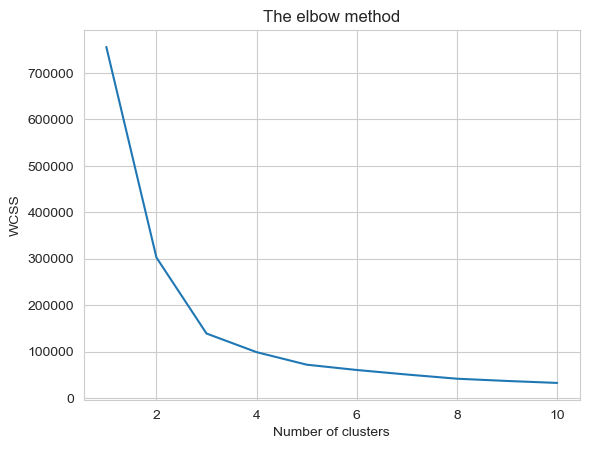

In [61]:
# 使用肘部法则（elbow method）寻找最佳聚类数
wcss = []
train = X
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
# 选择簇数 k（可以根据需要尝试不同的 k 值，通常会使用肘部法则来选择最佳 k）
k = 2  # 你可以修改 k 来选择不同的簇数
# 初始化模型 聚类数设为3；使用k—means++方法初始化质心；最多迭代300次；在不同的质心初始位置下重复聚类 10 次，并选择结果最好的模型；随机种子设为0
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 3000, n_init = 10, random_state = 0)

labels_s = kmeans.fit_predict(train)

Y.loc[Y['attack_type_digit'] != 1, 'attack_type_digit'] = 0
train_label = Y.to_numpy().flatten()

C:\Users\Xuliang5262001\AppData\Local\Temp\ipykernel_12808\135413178.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[Y['attack_type_digit'] != 1, 'attack_type_digit'] = 0


In [63]:
dff = pd.DataFrame({
    'cluster': labels_s,  # 聚类标签
    'true_label': train_label  # 真实标签
})
# 查看每个簇中真实标签的分布
cluster_0_true_labels = dff[dff['cluster'] == 0]['true_label']
cluster_1_true_labels = dff[dff['cluster'] == 1]['true_label']
print("Cluster 0's true labels:\n",cluster_0_true_labels.value_counts())
print("Cluster 1's true labels:\n",cluster_1_true_labels.value_counts())

Cluster 0's true labels:
 true_label
0    280766
1        76
Name: count, dtype: int64
Cluster 1's true labels:
 true_label
0    115977
1     97202
Name: count, dtype: int64


准确率 (Accuracy): 0.7651
精确率 (Precision): 0.8927
召回率 (Recall): 0.7651
F1 分数 (F1 Score): 0.7888


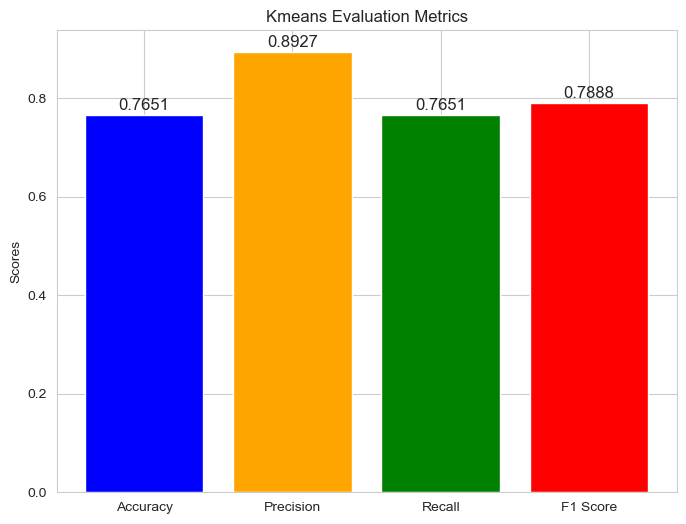

In [64]:


# labels_s: 聚类标签
# Y1_train: 真实标签

t = train_label

# 计算准确率 (Accuracy)
accuracy = accuracy_score(t, labels_s)

# 计算精确率 (Precision) - 对于多类别问题，使用加权平均
precision = precision_score(t, labels_s, average='weighted', zero_division=1)

# 计算召回率 (Recall) - 同样使用加权平均
recall = recall_score(t, labels_s, average='weighted', zero_division=1)

# 计算 F1 分数 (F1 Score)
f1 = f1_score(t, labels_s, average='weighted', zero_division=1)

# 输出评估结果
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"精确率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1 分数 (F1 Score): {f1:.4f}")
# 绘制柱状图
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'orange', 'green', 'red'])

bars = plt.bar(metrics, scores, color=['blue', 'orange', 'green', 'red'])
# 在每个柱形图上方添加数值
for bar in bars:
    yval = bar.get_height()  # 获取柱子的高度
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f'{yval:.4f}', ha='center', va='bottom', fontsize=12)


# 添加标签和标题
plt.ylabel('Scores')
plt.title('Kmeans Evaluation Metrics')

# 保存图像
plt.savefig('./picture/Kmeans_evaluation_metrics.png', format='png')

# 显示柱状图
plt.show()
